In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors

# Definition of flow caracteristic

In [52]:
#List of constants
kinematic_viscosity = 1e-8 #approximate value of kinematic viscosity for CO2 in m2/s
diffusion_coefficient = 1e-9 #approximate value of diffusion coefficient for CO2 in m2/s, to check
schmidt_number = kinematic_viscosity/diffusion_coefficient

In [53]:
#Functions that returns lists of linearly spaced values for Re, L, U, T, Pr...(to complete)
def Re_list_generator(Re_min, Re_max, Re_number_of_points = 1000):
    return np.linspace(Re_min, Re_max, Re_number_of_points)

def Pr_list_generator(Pr_carac_min, Pr_carac_max, Pr_carac_number_of_points = 1000):
    return np.linspace(Pr_carac_min, Pr_carac_max, Pr_carac_number_of_points)

def L_list_generator(L_min, L_max, L_number_of_points = 1000):
    return np.linspace(L_min, L_max, L_number_of_points)

def U_list_generator(U_min, U_max, U_number_of_points = 1000):
    return np.linspace(U_min, U_max, U_number_of_points)

def T_carac_list_generator(T_carac_min, T_carac_max, T_carac_number_of_points = 1000):
    return np.linspace(T_carac_min, T_carac_max, T_carac_number_of_points)


In [54]:
#Generate here the lists for calculation, modify ranges and number of points here as desired
Re_list = Re_list_generator(Re_min = 1e0, Re_max = 1e4, Re_number_of_points = 1000)
L_list = L_list_generator(L_min = 1e-6, L_max = 1e-3, L_number_of_points = 1000) #Caracteristic length of flow  in meters
T_carac_list = T_carac_list_generator(T_carac_min = 1e-3, T_carac_max = 1e0, T_carac_number_of_points = 1000) #Caracteristic timescale of flow in seconds
U_list = U_list_generator(U_min = 1e-1, U_max = 2, U_number_of_points = 1000) #Caracteristic speed of flow in m.s-1

In [55]:
#Defines System variables with regards to previously given ones
#Re_list = U_list*L_list/kinematic_viscosity #Defines Re approximate for given range of U and L
#T_carac_list = L_list/U_list

# Kolmogorov scale approximate

## Kolmogorov length scale approximate

### Kolmogorv lengthscale approximate plot depending on Re and caracteristic lengthscale L of system

In [56]:
def calculate_approx_kolm_lengthscale_RevsL(Re_list, L_list):
    """
    Function that calculates the approximate Kolmogorov lengthscale for a given range of L and Re.
    
    Input:
    - Re_list: Array of Reynolds numbers
    - L_list: Array of characteristic length values (in meters)
    
    Output:
    - eta_array: Array of Kolmogorov lengthscale (approximate) for each pair of Re and L values (in micrometers)
    """
    # Reshape the arrays for calculation
    Re_list_reshaped = np.reshape(Re_list, (len(Re_list), 1))
    L_list_reshaped = np.reshape(L_list, (len(L_list), 1))

    # Calculate Kolmogorov lengthscale with eta ≈ L / (Re^0.75)
    Re_list_reshaped_raised_to_power = Re_list_reshaped**(-0.75)
    eta_array = L_list_reshaped @ Re_list_reshaped_raised_to_power.T
    
    # Convert to micrometers
    eta_array = eta_array * 1e6
    
    return eta_array


In [57]:
def plot_kolm_lengthscale_RevsL(Re_list, L_list, eta_array, Re_log_scale=True, L_log_scale=True, eta_log_scale=True, colormap='jet', nbr_of_contours=10):
    """
    Function that plots a colormap of the approximate Kolmogorov lengthscale for a given range of L and Re.
    
    Input:
    - Re_list: Array of Reynolds numbers
    - L_list: Array of characteristic length values (in meters)
    - eta_array: Array of Kolmogorov lengthscale values (in micrometers)
    - Re_log_scale: Boolean indicating whether to use a logarithmic scale for the Re axis (default: True)
    - L_log_scale: Boolean indicating whether to use a logarithmic scale for the L axis (default: True)
    - eta_log_scale: Boolean indicating whether to use a logarithmic scale for the eta colormap (default: True)
    - colormap: Name of the colormap (default: 'jet')
    - nbr_of_contours: Number of contour levels for the colormap (default: 10)
    """
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Create the filled contour plot
    if eta_log_scale:
        fig = plt.contourf(Re_list, L_list, eta_array, levels=nbr_of_contours, cmap=colormap, norm=colors.LogNorm())
    else:
        fig = plt.contourf(Re_list, L_list, eta_array, levels=nbr_of_contours, cmap=colormap)

    # Format function for scientific notation on the axis
    def fmt(x, pos):
        a, b = '{:.2e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)
    
    if Re_log_scale:
        # Set logarithmic scale for the X axis
        ax.set_xscale('log')

    if L_log_scale:
        # Set logarithmic scale for the Y axis
        ax.set_yscale('log')

    # Add a colorbar
    cbar = plt.colorbar(fig, format=ticker.FuncFormatter(fmt))

    # Set labels for the colorbar
    cbar.ax.set_ylabel('Kolmogorov lengthscale (µm)', rotation=-90, va="bottom")

    # Add a title and labels to the axes
    ax.set_title('Approximate Kolmogorov lengthscale')
    ax.set_xlabel('Re')
    ax.set_ylabel('L (m)')

    # Show the plot
    plt.show()

In [58]:
eta_array = calculate_approx_kolm_lengthscale_RevsL(Re_list, L_list)

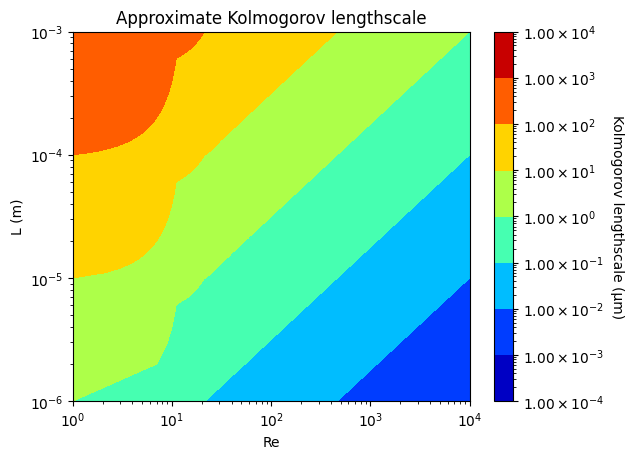

In [59]:
plot_kolm_lengthscale_RevsL(Re_list, L_list, eta_array, Re_log_scale = True, L_log_scale = True, eta_log_scale = True, colormap = 'jet', nbr_of_contours=10)

### Kolmogorv lengthscale approximate plot depending on U and caracteristic lengthscale L of system

In [60]:
def calculate_approx_kolm_lengthscale_UvsL(U_list, L_list, kinematic_viscosity):
    """
    Function that calculates the approximate Kolmogorov lengthscale for a given range of L and U.
    
    Input:
    - U_list: Array of characteristic speed values (in m/s)
    - L_list: Array of characteristic length values (in meters)
    - kinematic_viscosity: Kinematic viscosity of the fluid (in m^2/s)
    
    Output:
    - eta_array: Array of Kolmogorov lengthscale (approximate) for each pair of U and L values (in micrometers)
    """
    # Reshape the arrays for calculation
    U_list_reshaped = np.reshape(U_list, (len(U_list), 1))
    L_list_reshaped = np.reshape(L_list, (len(L_list), 1))

    # Calculate Kolmogorov lengthscale with eta ≈ (mu^3 * L / U^3)^0.25
    numerator = (kinematic_viscosity**3) * L_list_reshaped
    denominator = U_list_reshaped**-3
    eta_array = (numerator @ denominator.T) ** 0.25
    
    # Convert to micrometers
    eta_array = eta_array * 1e6
    
    return eta_array


In [61]:
eta_array = calculate_approx_kolm_lengthscale_UvsL(U_list, L_list, kinematic_viscosity)

In [62]:
def plot_kolm_lengthscale_UvsL(U_list, L_list, eta_array, U_log_scale=True, L_log_scale=True, eta_log_scale=True, colormap='jet', nbr_of_contours=10):
    """
    Function that plots a colormap of the approximate Kolmogorov lengthscale for a given range of L and U.
    
    Input:
    - U_list: Array of characteristic speed values (in m/s)
    - L_list: Array of characteristic length values (in meters)
    - eta_array: Array of Kolmogorov lengthscale values (in micrometers)
    - U_log_scale: Boolean indicating whether to use a logarithmic scale for the U axis (default: True)
    - L_log_scale: Boolean indicating whether to use a logarithmic scale for the L axis (default: True)
    - eta_log_scale: Boolean indicating whether to use a logarithmic scale for the eta colormap (default: True)
    - colormap: Name of the colormap (default: 'jet')
    - nbr_of_contours: Number of contour levels for the colormap (default: 10)
    """
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Create the filled contour plot
    if eta_log_scale:
        fig = plt.contourf(U_list, L_list, eta_array, levels=nbr_of_contours, cmap=colormap, norm=colors.LogNorm())
    else:
        fig = plt.contourf(U_list, L_list, eta_array, levels=nbr_of_contours, cmap=colormap)

    # Format function for scientific notation on the axis
    def fmt(x, pos):
        a, b = '{:.2e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)
    
    if U_log_scale:
        # Set logarithmic scale for the X axis
        ax.set_xscale('log')

    if L_log_scale:
        # Set logarithmic scale for the Y axis
        ax.set_yscale('log')

    # Add a colorbar
    cbar = plt.colorbar(fig, format=ticker.FuncFormatter(fmt))

    # Set labels for the colorbar
    cbar.ax.set_ylabel('Kolmogorov lengthscale (µm)', rotation=-90, va="bottom")

    # Add a title and labels to the axes
    ax.set_title('Approximate Kolmogorov lengthscale')
    ax.set_xlabel('U (m/s)')
    ax.set_ylabel('L (m)')

    # Show the plot
    plt.show()


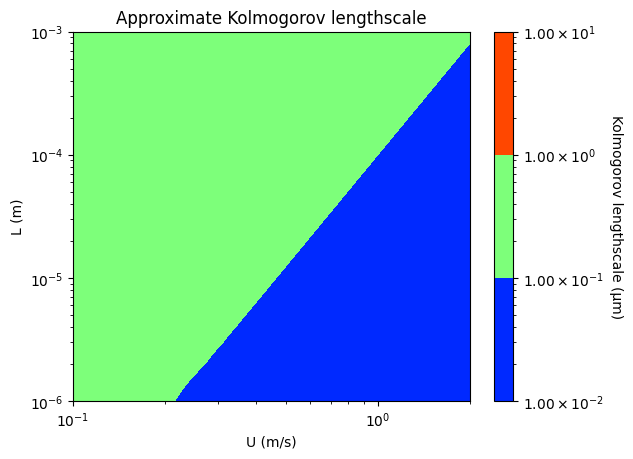

In [63]:
plot_kolm_lengthscale_UvsL(U_list, L_list, eta_array, U_log_scale = True, L_log_scale = True, eta_log_scale = True, colormap = 'jet', nbr_of_contours=10)

## Kolmogorv timescale approximate

### Kolmogorv timescale approximate plot depending on Re and caracteristic timescale T of system

In [64]:
def calculate_approx_kolm_timescale_RevsT_carac(Re_list, T_carac_list):
    """
    Function that calculates the approximate Kolmogorov timescale for a given range of T_carac and Re.
    
    Input:
    - Re_list: Array of Reynolds numbers
    - T_carac_list: Array of characteristic time values (in seconds)
    
    Output:
    - t_eta_array: Array of Kolmogorov timescale (approximate) for each pair of Re and L values (in seconds)
    """
    # Reshape the arrays for calculation
    Re_list_reshaped = np.reshape(Re_list, (len(Re_list), 1))
    T_carac_list_reshaped = np.reshape(T_carac_list, (len(T_carac_list), 1))

    # Calculate Kolmogorov timescale with t_eta =~ T_carac/(Re^0.5)
    Re_list_reshaped_raised_to_power = Re_list_reshaped**(-0.5)
    t_eta_array = T_carac_list_reshaped @ Re_list_reshaped_raised_to_power.T
    
    return t_eta_array

In [65]:
t_eta_array = calculate_approx_kolm_timescale_RevsT_carac(Re_list, T_carac_list)

In [66]:
def plot_kolm_timescale(Re_list, T_carac_list, t_eta_array, Re_log_scale=True, T_carac_log_scale=True, t_eta_log_scale=True, colormap='jet', nbr_of_countours=10):
    """
    Function that plots a colormap of the approximate Kolmogorov timescale for a given range of T_carac and Re.

    Inputs:
    - Re_list: List of Reynolds numbers
    - T_carac_list: List of characteristic times (in seconds)
    - t_eta_array: Array of Kolmogorov timescale values (in seconds)
    - Re_log_scale: Boolean indicating whether to use a logarithmic scale for the X axis (Re). Default is True.
    - T_carac_log_scale: Boolean indicating whether to use a logarithmic scale for the Y axis (T_carac). Default is True.
    - t_eta_log_scale: Boolean indicating whether to use a logarithmic scale for the colormap of t_eta. Default is True.
    - colormap: Colormap to use for the filled contour plot. Default is 'jet'.
    - nbr_of_countours: Number of contours to plot. Default is 10.

    Output:
    - Countour map of t_eta, i.e., the approximate Kolmogorov timescale.
    """

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Create the filled contour plot
    if t_eta_log_scale:
        fig = plt.contourf(Re_list, T_carac_list, t_eta_array, levels=nbr_of_countours, cmap=colormap, norm=colors.LogNorm())
    else:
        fig = plt.contourf(Re_list, T_carac_list, t_eta_array, levels=nbr_of_countours, cmap=colormap)

    # Format function for scientific notation on axis
    def fmt(x, pos):
        a, b = '{:.2e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)

    if Re_log_scale:
        # Set logarithmic scale for the X axis
        ax.set_xscale('log')

    if T_carac_log_scale:
        # Set logarithmic scale for the Y axis
        ax.set_yscale('log')

    # Add a colorbar
    cbar = plt.colorbar(fig, format=ticker.FuncFormatter(fmt))

    # Set labels for the colorbar
    cbar.ax.set_ylabel('Kolmogorov timescale (s)', rotation=-90, va="bottom")

    # Add a title and labels to the axes
    ax.set_title('Approximate Kolmogorov timescale')
    ax.set_xlabel('Re')
    ax.set_ylabel('T_carac (s)')

    # Show the plot
    plt.show()


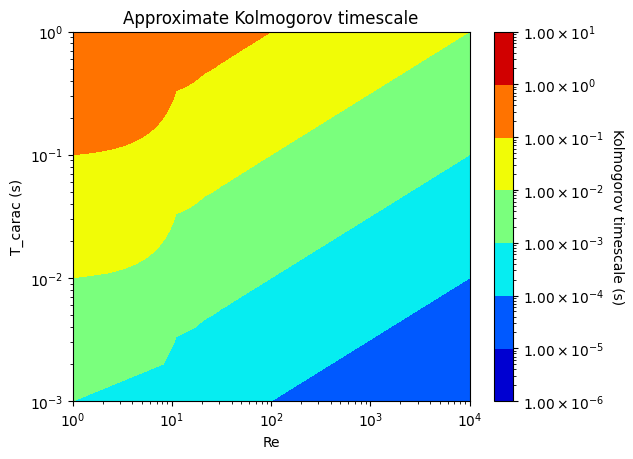

In [67]:
plot_kolm_timescale(Re_list, T_carac_list, t_eta_array, Re_log_scale = True, T_carac_log_scale = True, t_eta_log_scale = True, colormap = 'jet', nbr_of_countours = 10)

### Kolmogorv timescale approximate plot depending on U and L

In [68]:
def calculate_approx_kolm_timescale_UvsL(U_list, L_list, kinematic_viscosity):
    """
    Function that calculates the approximate Kolmogorov timescale for a given range of L and U.

    Input:
    - U_list: Array of characteristic speed values (in m/s)
    - L_list: Array of characteristic length values (in meters)
    - kinematic_viscosity: Kinematic viscosity of the fluid (in m^2/s)

    Output:
    - t_eta_array: Array of Kolmogorov timescale values (in seconds) for each pair of U and L values in the given range
    """
    # Create the data to calculate
    U_list_reshaped = np.reshape(U_list, (np.size(U_list), 1))
    L_list_reshaped = np.reshape(L_list, (np.size(L_list), 1))

    # Calculate Kolmogorov timescale with t_eta =~ (L * mu / U^3)^0.5
    numerator = kinematic_viscosity * L_list_reshaped
    denominator = U_list_reshaped ** -3
    t_eta_array = (numerator @ denominator.T) ** 0.5

    return t_eta_array


In [69]:
t_eta_array = calculate_approx_kolm_timescale_UvsL(U_list, L_list, kinematic_viscosity)

In [70]:
def plot_kolm_timescale_UvsL(U_list, L_list, t_eta_array, U_log_scale=True, L_log_scale=True, t_eta_log_scale=True, colormap='jet', nbr_of_contours=10):
    """
    Function that plots a colormap of the approximate Kolmogorov timescale for a given range of L and U.

    Input:
    - U_list: Array of characteristic speed values (in m/s)
    - L_list: Array of characteristic length values (in meters)
    - t_eta_array: Array of Kolmogorov timescale values (in seconds) for each pair of U and L values
    - U_log_scale: Boolean flag indicating whether to use a logarithmic scale for the X axis (default: True)
    - L_log_scale: Boolean flag indicating whether to use a logarithmic scale for the Y axis (default: True)
    - t_eta_log_scale: Boolean flag indicating whether to use a logarithmic scale for the colormap (default: True)
    - colormap: Name of the colormap to use (default: 'jet')
    - nbr_of_countours: Number of contour levels for the colormap (default: 10)
    """
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Create the filled contour plot
    if t_eta_log_scale:
        fig = plt.contourf(U_list, L_list, t_eta_array, levels=nbr_of_contours, cmap=colormap, norm=colors.LogNorm())
    else:
        fig = plt.contourf(U_list, L_list, t_eta_array, levels=nbr_of_contours, cmap=colormap)

    # Format func for scientific notation on axis
    def fmt(x, pos):
        a, b = '{:.2e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)

    if U_log_scale:
        # Set logarithmic scale for the X axis
        ax.set_xscale('log')

    if L_log_scale:
        # Set logarithmic scale for the Y axis
        ax.set_yscale('log')

    # Add a colorbar
    cbar = plt.colorbar(fig, format=ticker.FuncFormatter(fmt))

    # Set labels for the colorbar
    cbar.ax.set_ylabel('Kolmogorov timescale (s)', rotation=-90, va="bottom")

    # Add a title and labels to the axes
    ax.set_title('Approximate Kolmogorov timescale')
    ax.set_xlabel('U (m/s)')
    ax.set_ylabel('L (m)')

    # Show the plot
    plt.show()


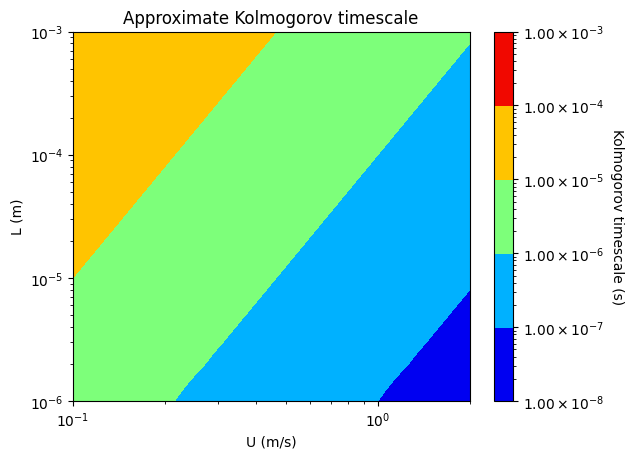

In [71]:
plot_kolm_timescale_UvsL(U_list, L_list, t_eta_array, U_log_scale = True, L_log_scale = True, t_eta_log_scale = True, colormap = 'jet', nbr_of_contours = 10)


# Taylor scale approximate

## Taylor length scale approximate

### Taylor lengthscale approximate plot depending on U and L

In [72]:
def calculate_approx_taylor_lengthscale_UvsL(U_list, L_list, kinematic_viscosity):
    """
    Function that calculates the approximate Taylor lengthscale for a given range of L and U.

    Input:
    - U_list: Array of characteristic speed values (in m/s)
    - L_list: Array of characteristic length values (in meters)
    - kinematic_viscosity: Kinematic viscosity (in m^2/s)

    Output:
    - lambda_array: Array of Taylor lengthscale values (in micrometers) for each pair of U and L values

    Formula: lambda =~ (10 * L * mu / U)^0.5
    """

    # Reshape the arrays to Nx1 arrays for matrix multiplication
    U_list_reshaped = np.reshape(U_list, (np.size(U_list), 1))
    L_list_reshaped = np.reshape(L_list, (np.size(L_list), 1))

    # Calculate Taylor lengthscale
    numerator = 10 * L_list_reshaped * kinematic_viscosity
    denominator = U_list_reshaped ** -1
    lambda_array = (numerator @ denominator.T) ** 0.5  # Values of Taylor lengthscale (Approximate) in meter
    lambda_array = lambda_array * 1e6  # Conversion to micrometers

    return lambda_array


In [73]:
lambda_array = calculate_approx_taylor_lengthscale_UvsL(U_list, L_list, kinematic_viscosity)

In [74]:
def plot_taylor_lengthscale_UvsL(U_list, L_list, lambda_array, U_log_scale=True, L_log_scale=True, lambda_array_log_scale=True, colormap='jet', nbr_of_contours=10):
    """
    Function that plots a colormap of the approximate Taylor lengthscale for a given range of L and U.

    Input:
    - U_list: Array of characteristic speed values (in m/s)
    - L_list: Array of characteristic length values (in meters)
    - lambda_array: Array of Taylor lengthscale values (in micrometers) for each pair of U and L values
    - U_log_scale: Boolean flag indicating whether to use a logarithmic scale for the X axis (default: True)
    - L_log_scale: Boolean flag indicating whether to use a logarithmic scale for the Y axis (default: True)
    - lambda_array_log_scale: Boolean flag indicating whether to use a logarithmic scale for the colormap (default: True)
    - colormap: Name of the colormap to use (default: 'jet')
    - nbr_of_countours: Number of contour levels for the colormap (default: 10)
    """
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Create the filled contour plot
    if lambda_array_log_scale:
        fig = plt.contourf(U_list, L_list, lambda_array, levels=nbr_of_contours, cmap=colormap, norm=colors.LogNorm())
    else:
        fig = plt.contourf(U_list, L_list, lambda_array, levels=nbr_of_contours, cmap=colormap)

    # Format func for scientific notation on axis
    def fmt(x, pos):
        a, b = '{:.2e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)

    if U_log_scale:
        # Set logarithmic scale for the X axis
        ax.set_xscale('log')

    if L_log_scale:
        # Set logarithmic scale for the Y axis
        ax.set_yscale('log')

    # Add a colorbar
    cbar = plt.colorbar(fig, format=ticker.FuncFormatter(fmt))

    # Set labels for the colorbar
    cbar.ax.set_ylabel('Taylor lengthscale (µm)', rotation=-90, va="bottom")

    # Add a title and labels to the axes
    ax.set_title('Approximate Taylor lengthscale')
    ax.set_xlabel('U (m/s)')
    ax.set_ylabel('L (m)')

    # Show the plot
    plt.show()


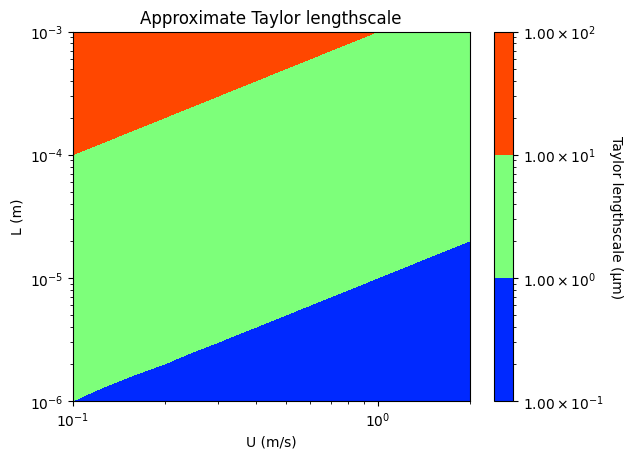

In [75]:
plot_taylor_lengthscale_UvsL(U_list, L_list, lambda_array, U_log_scale=True, L_log_scale=True, lambda_array_log_scale=True, colormap='jet', nbr_of_contours=10)


## Taylor time scale approximate

### Taylor timescale approximate plot depending on U and L

In [76]:
def calculate_approx_taylor_timescale_UvsL(U_list, L_list, kinematic_viscosity):
    """
    Function that calculates the approximate Taylor timescale for a given range of L and U.

    Input:
    - U_list: Array of characteristic speed values (in m/s)
    - L_list: Array of characteristic length values (in meters)
    - kinematic_viscosity: Kinematic viscosity (in m^2/s)

    Output:
    - t_lambda_array: Array of Taylor timescale values (in seconds) for each pair of U and L values

    Formula: t_lambda_array =~ (15 * L * mu / U^3)^0.5
    """

    # Reshape the arrays to Nx1 arrays for matrix multiplication
    U_list_reshaped = np.reshape(U_list, (np.size(U_list), 1))
    L_list_reshaped = np.reshape(L_list, (np.size(L_list), 1))

    # Calculate Taylor timescale
    numerator = 15 * L_list_reshaped * kinematic_viscosity
    denominator = U_list_reshaped ** -3
    t_lambda_array = (numerator @ denominator.T) ** 0.5  # Values of Taylor timescale (Approximate) in seconds

    return t_lambda_array


In [77]:
t_lambda_array = calculate_approx_taylor_timescale_UvsL(U_list, L_list, kinematic_viscosity)


In [78]:
def plot_taylor_timescale_UvsL(U_list, L_list, t_lambda_array, U_log_scale=True, L_log_scale=True, t_lambda_array_log_scale=True, colormap='jet', nbr_of_contours=10):
    """
    Function that plots a colormap of the approximate Taylor timescale for a given range of L and U.

    Input:
    - U_list: Array of characteristic speed values (in m/s)
    - L_list: Array of characteristic length values (in meters)
    - t_lambda_array: Array of Taylor timescale values (in seconds) for each pair of U and L values
    - U_log_scale: Boolean flag indicating whether to use a logarithmic scale for the X axis (default: True)
    - L_log_scale: Boolean flag indicating whether to use a logarithmic scale for the Y axis (default: True)
    - t_lambda_array_log_scale: Boolean flag indicating whether to use a logarithmic scale for the colormap (default: True)
    - colormap: Name of the colormap to use (default: 'jet')
    - nbr_of_countours: Number of contour levels for the colormap (default: 10)
    """
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Create the filled contour plot
    if t_lambda_array_log_scale:
        fig = plt.contourf(U_list, L_list, t_lambda_array, levels=nbr_of_contours, cmap=colormap, norm=colors.LogNorm())
    else:
        fig = plt.contourf(U_list, L_list, t_lambda_array, levels=nbr_of_contours, cmap=colormap)

    # Format func for scientific notation on axis
    def fmt(x, pos):
        a, b = '{:.2e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)

    if U_log_scale:
        # Set logarithmic scale for the X axis
        ax.set_xscale('log')

    if L_log_scale:
        # Set logarithmic scale for the Y axis
        ax.set_yscale('log')

    # Add a colorbar
    cbar = plt.colorbar(fig, format=ticker.FuncFormatter(fmt))

    # Set labels for the colorbar
    cbar.ax.set_ylabel('Taylor timescale (s)', rotation=-90, va="bottom")

    # Add a title and labels to the axes
    ax.set_title('Approximate Taylor timescale')
    ax.set_xlabel('U (m/s)')
    ax.set_ylabel('L (m)')

    # Show the plot
    plt.show()


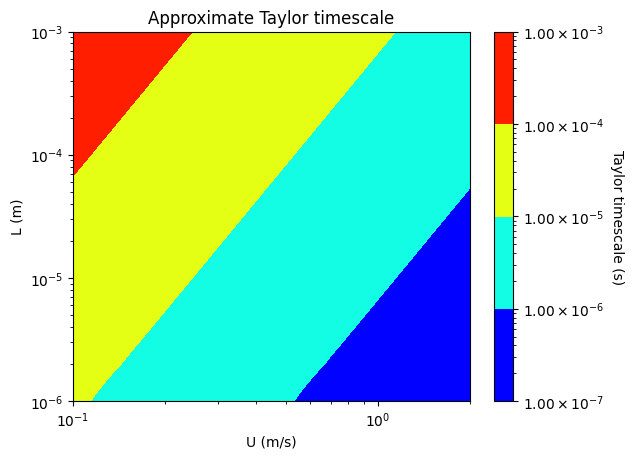

In [79]:
plot_taylor_timescale_UvsL(U_list, L_list, t_lambda_array, U_log_scale=True, L_log_scale=True, t_lambda_array_log_scale=True, colormap='jet', nbr_of_contours=10)


# Batchelor scale approximate

## Batchelor lenghtscale approximate

### Batchelor lenghtscale approximate plot depending on U and L

In [80]:
# Formula: batchelor_lengthscale = kolmogorov_lengthscale/sqrt(Sc), see ref on wikipedia Batchelor scale

lambda_batchelor_array = eta_array/np.sqrt(schmidt_number)

In [81]:
def plot_batchelor_lenghtscale_UvsL(U_list, L_list, lambda_batchelor_array, U_log_scale=True, L_log_scale=True, lambda_batchelor_log_scale=True, colormap='jet', nbr_of_contours=10):
    """
    Function that plots a colormap of the approximate Batchelor lenghtscale for a given range of L and U.

    Input:
    - U_list: Array of characteristic speed values (in m/s)
    - L_list: Array of characteristic length values (in meters)
    - lambda_batchelor_array: Array of Batchelor lenghtscale values (in micro meters) for each pair of U and L values
    - U_log_scale: Boolean flag indicating whether to use a logarithmic scale for the X axis (default: True)
    - L_log_scale: Boolean flag indicating whether to use a logarithmic scale for the Y axis (default: True)
    - lambda_batchelor_log_scale: Boolean flag indicating whether to use a logarithmic scale for the colormap (default: True)
    - colormap: Name of the colormap to use (default: 'jet')
    - nbr_of_countours: Number of contour levels for the colormap (default: 10)
    """
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Create the filled contour plot
    if lambda_batchelor_log_scale:
        fig = plt.contourf(U_list, L_list, lambda_batchelor_array, levels=nbr_of_contours, cmap=colormap, norm=colors.LogNorm())
    else:
        fig = plt.contourf(U_list, L_list, lambda_batchelor_array, levels=nbr_of_contours, cmap=colormap)

    # Format func for scientific notation on axis
    def fmt(x, pos):
        a, b = '{:.2e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)

    if U_log_scale:
        # Set logarithmic scale for the X axis
        ax.set_xscale('log')

    if L_log_scale:
        # Set logarithmic scale for the Y axis
        ax.set_yscale('log')

    # Add a colorbar
    cbar = plt.colorbar(fig, format=ticker.FuncFormatter(fmt))

    # Set labels for the colorbar
    cbar.ax.set_ylabel('Batchelor lenghtscale (µm)', rotation=-90, va="bottom")

    # Add a title and labels to the axes
    ax.set_title('Approximate Batchelor lenghtscale')
    ax.set_xlabel('U (m/s)')
    ax.set_ylabel('L (m)')

    # Show the plot
    plt.show()


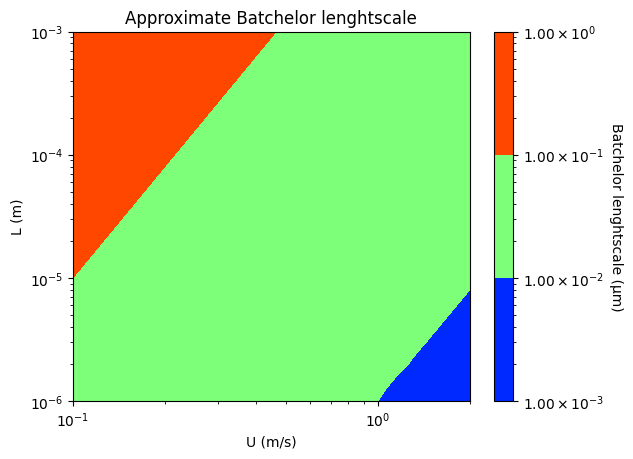

In [82]:
plot_batchelor_lenghtscale_UvsL(U_list, L_list, lambda_batchelor_array, U_log_scale=True, L_log_scale=True, lambda_batchelor_log_scale=True, colormap='jet', nbr_of_contours=10)


### Batchelor timescale approximate plot depending on U and L

In [83]:
## ???? Can i define a Batchelor timescale ?

# Integral scale approximate

Is it relevant ?? In the sense that I used l_integral ~ L in the previous calculation and that we should at least expect to see this scale of turbulence with our sensors

# Time vs spatial resolution

In [84]:
#L = 1e-6 #in meters, To specify
#U = 1e0 # in m/s, To specify
#T = 1e-6 #in seconds

turbulent_timescales_values = [1e-8, 1e-7, 1e-6] #List of turbulent approximate timescales values for given L and U values (integral, Taylor, Batchelor, Kolmogorov... see Pope's turbulence book for ref), in seconds
turbulent_lengthscales_values = [1e-9, 1e-8, 1e-7, 1e-6] #List of turbulent approximate lengthscales values for given L and U values (integral, Taylor, Batchelor, Kolmogorov... see Pope's turbulence book for ref), in meters

turbulent_timescales_labels = ['Kolm','Taylor','Int'] #List of turbulent timescales labels for each numerical value
turbulent_lengthscales_labels = ['Kolm','Batch','Taylor','Int'] #List of turbulent lengthscale labels for each numerical value


sensor_labels = ['sensor_type_1', 'sensor_type_2'] #List of the different sensor tech names
spatial_resolutions = [1e-7,1e-8] #List of the different sensor techs approxiamte spatial resolution limits in meters
temporal_resolutions = [1e-8,1e-7] #List of the different sensor techs approxiamte temporal resolution limits in seconds


#Max values
#T = max(turbulent_timescales_values)
#L = max(turbulent_lengthscales_values)

#Min values
#min_l = min(turbulent_lengthscales_values)
#min_t = min(turbulent_timescales_values)



In [88]:
import matplotlib.pyplot as plt

def plot_time_vs_spatial_resolution(turbulent_timescales_values, turbulent_timescales_labels, turbulent_lengthscales_values, turbulent_lengthscales_labels, sensor_labels, spatial_resolutions, temporal_resolutions, color_zones=True):
    """
    Plots the sensors' spatial and temporal resolution limits compared to turbulent spatial and temporal scales at a given flow.

    Args:
        turbulent_timescales_values (list): List of turbulent timescale values.
        turbulent_timescales_labels (list): List of turbulent timescale labels.
        turbulent_lengthscales_values (list): List of turbulent lengthscales values.
        turbulent_lengthscales_labels (list): List of turbulent lengthscales labels.
        sensor_labels (list): List of labels for the sensors.
        spatial_resolutions (list): List of spatial resolutions of the sensors.
        temporal_resolutions (list): List of temporal resolutions of the sensors.
        color_zones (bool, optional): Flag indicating whether to add color zones. Defaults to True.

    Returns:
        None
    """
    # Max values
    T = max(turbulent_timescales_values)
    L = max(turbulent_lengthscales_values)
    
    # Min values
    min_l = min(turbulent_lengthscales_values)
    min_t = min(turbulent_timescales_values)
    
    color_list = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    
    # Create Figure and Axes objects
    fig, ax = plt.subplots()

    # Set labels for X and Y axes
    ax.set_xlabel('Turbulence lengthscales (m)')
    ax.set_ylabel('Turbulence timescales (s)')

    # Set the limits for X and Y axes
    ax.set_xlim(min_l / 10, L * 10)  # X-axis limits from min_l/10 to L*10
    ax.set_ylim(min_t / 10, T * 10)  # Y-axis limits from min_t/10 to T*10
    
    # Add vertical and horizontal lines corresponding to sensors spatiotemporal resolutions
    for index, label in enumerate(sensor_labels):
        ax.axvline(x=spatial_resolutions[index], color=color_list[index], linestyle='--', label=label)  # Vertical line at x=spatial_resolutions[index]
        ax.axhline(y=temporal_resolutions[index], color=color_list[index], linestyle='--')  # Horizontal line at y=temporal_resolutions[index]
        if color_zones:
            # Add a horizontal span between y=0 and y=temporal_resolutions[index]
            ax.axhspan(0, temporal_resolutions[index], color=color_list[index], alpha=0.3)

            # Add a vertical span between x=0 and x=spatial_resolutions[index]
            ax.axvspan(0, spatial_resolutions[index], color=color_list[index], alpha=0.3)

    # Set axis scale to log
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Set custom tick positions and labels for the X-axis
    xticks = turbulent_lengthscales_values
    xtick_labels = [f"{label} = {value}" for label, value in zip(turbulent_lengthscales_labels, turbulent_lengthscales_values)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

    # Set custom tick positions and labels for the Y-axis
    yticks = turbulent_timescales_values
    ytick_labels = [f"{label} = {value}" for label, value in zip(turbulent_timescales_labels, turbulent_timescales_values)]
    ax.set_yticks(yticks)
    ax.set_yticklabels(ytick_labels)

    # Add a legend
    ax.legend()

    # Set title for the plot
    ax.set_title('Observable turbulent scales domains')

    # Display the plot
    plt.show()


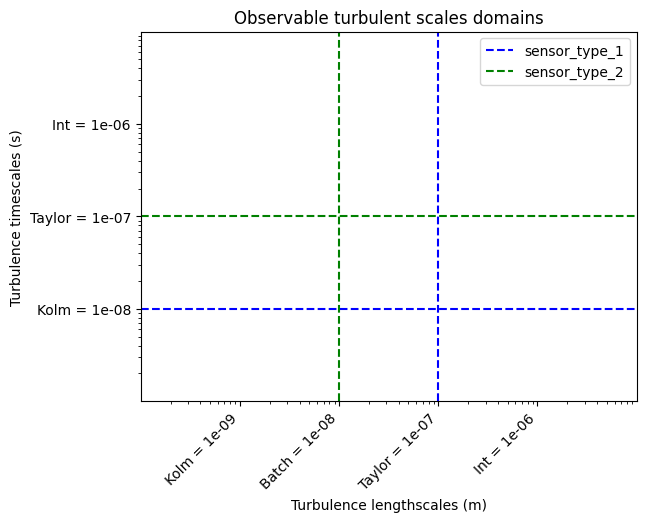

In [89]:
plot_time_vs_spatial_resolution(turbulent_timescales_values, turbulent_timescales_labels, turbulent_lengthscales_values, turbulent_lengthscales_labels, sensor_labels, spatial_resolutions, temporal_resolutions, color_zones = False)

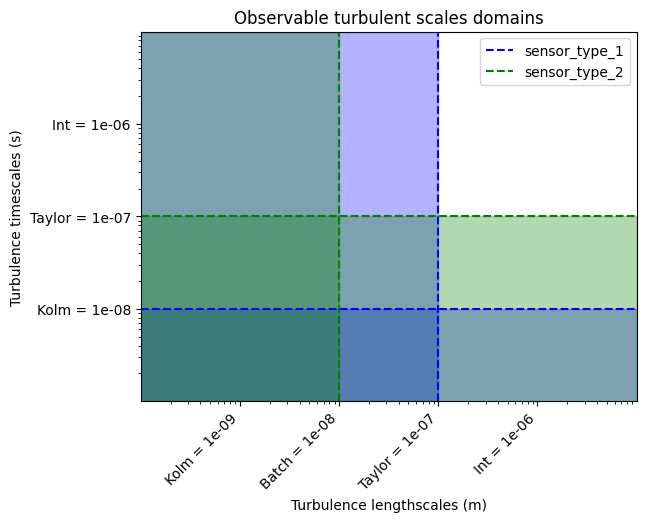

In [90]:
plot_time_vs_spatial_resolution(turbulent_timescales_values, turbulent_timescales_labels, turbulent_lengthscales_values, turbulent_lengthscales_labels, sensor_labels, spatial_resolutions, temporal_resolutions, color_zones = True)